In [2]:
import pandas as pd
import sklearn.ensemble as sken
import numpy as np
import sklearn.metrics as mts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier

In [3]:
# df = pd.read_csv('https://raw.githubusercontent.com/thecodizt/Datasets/main/music_processed_data_encoded.csv')
df= pd.read_csv('data.csv')

In [4]:
df

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,artist_name,composer,lyricist,language,genre_id,city,bd,gender,registered_via,registration_init_time,expiration_date
0,0,273,7641,3,8,4,1,229982,129,3782,3496,31.0,465,13,24,0,9,20110525,20170911
1,1,273,2363,3,8,3,1,224597,1640,4781,4522,3.0,465,13,24,0,9,20110525,20170911
2,2,273,4711,3,8,3,0,210364,1947,1745,2448,3.0,465,13,24,0,9,20110525,20170911
3,3,273,1892,3,8,3,1,240624,1322,1330,1705,31.0,465,13,24,0,9,20110525,20170911
4,4,273,9121,3,8,3,1,248685,1890,5744,5726,3.0,465,13,24,0,9,20110525,20170911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74154,74154,294,9309,0,11,6,0,231653,127,3785,3492,31.0,444,6,20,0,9,20090225,20170807
74155,74155,201,9531,2,12,2,0,200385,249,798,741,52.0,465,4,29,1,3,20120520,20180626
74156,74156,56,10543,0,11,6,0,214726,1157,3111,2878,52.0,465,11,48,0,9,20090313,20170811
74157,74157,56,594,0,11,6,0,221544,1240,209,185,52.0,1609,11,48,0,9,20090313,20170811


In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['target']),df['target'],test_size=0.2)

In [7]:
clf = LGBMClassifier()

In [8]:
clf.fit(x_train,y_train)

LGBMClassifier()

In [9]:
predicted=clf.predict(x_test)

In [10]:
mts.accuracy_score(y_test,predicted)

0.7113673139158576

In [11]:
from sklearn.model_selection import GridSearchCV

In [74]:
clf = LGBMClassifier()

In [75]:
lgb_param = {"n_estimators":[500,1000,1500],"max_depth":[20,25],"subsample":[0.5,0.8,1],"learning_rate":[0.1,0.02,0.3]}
lgb_cv = GridSearchCV(clf, lgb_param, cv=3, n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [76]:
lgb_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500, 'subsample': 0.5}

In [77]:
clf = LGBMClassifier(learning_rate=0.1,max_depth=20,n_estimators=500,subsample=0.5)

In [78]:
clf.fit(x_train,y_train)

LGBMClassifier(max_depth=20, n_estimators=500, subsample=0.5)

In [79]:
predicted=clf.predict(x_test)

In [80]:
mts.accuracy_score(y_test,predicted)

0.7318635382955772

In [81]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      6470
           1       0.74      0.80      0.77      8362

    accuracy                           0.73     14832
   macro avg       0.73      0.72      0.72     14832
weighted avg       0.73      0.73      0.73     14832



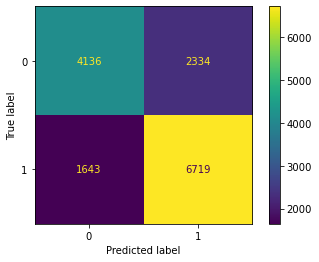

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test,predicted)

In [83]:
import pickle 
filename = 'light_gbm_model'
pickle.dump(clf,open(filename,'wb'))